In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import math

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score, roc_curve, mean_squared_error
from sklearn.utils import resample
from sklearn import preprocessing

In [2]:
advertiser_id = '3386'
path = "/Users/denniscimorosi/Desktop/Tesi/IPinYou/make-ipinyou-data-master/" + advertiser_id + "/"
train_name = advertiser_id + '.train.final.csv'
test_name = advertiser_id + '.test.final.csv'

In [3]:
train_df = pd.read_csv(path + train_name, delimiter=',')
test_df = pd.read_csv(path + test_name, delimiter=',')

In [4]:
train_df = train_df.drop(['timestamp', 'bidprice', 'slotprice', 'payprice'], axis=1)
test_df = test_df.drop(['timestamp', 'bidprice', 'slotprice', 'payprice'], axis=1)

In [5]:
X_train = train_df.drop('click', axis=1)
y_train = train_df.click

X_test = test_df.drop('click', axis=1)
y_test = test_df.click

In [6]:
# train
clf = LogisticRegression(max_iter=10, random_state=42, penalty="l2", solver="sag")
clf.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/test_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=10, random_state=42, solver='sag')

In [7]:
# predict
y_pred = clf.predict_proba(X_test)[:, 1]

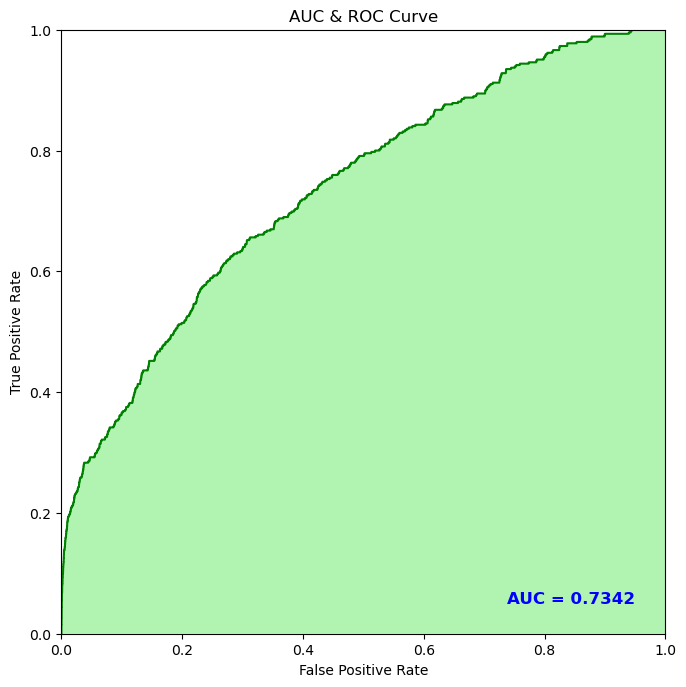

In [8]:
# auc
auc = roc_auc_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, y_pred, pos_label=1)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [9]:
# rmse
math.sqrt(mean_squared_error(y_test, y_pred))

0.028500479880930654

In [10]:
# export model
if True:
    file_name = advertiser_id + '.model.joblib' #if upsample else 'model.joblib'
    joblib.dump(clf, file_name)